In [23]:
#Predicting age of Abalone (kind of snails) from rings

import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone = pd.read_csv(url, header=None)
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
#Assigning names to columns
abalone.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
#Finding details about the dataset
abalone.info()
#Dropping sex column as it is non-numeric and irrelavant 
abalone = abalone.drop("Sex", axis=1)
abalone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
#Range of the Ring Column
abalone["Rings"].min()
#abalone["Rings"].max()

1

In [27]:
#Making input matrix X and output vector y. Note: .values convert pandas dataframe to NumPy array
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values
# print(X)
# print(y)

In [28]:
import numpy as np

# dividing the dataset into training and test sets
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    total_samples = len(X)
    num_test_samples = int(test_size * total_samples)
    test_indices = np.random.choice(total_samples, size=num_test_samples, replace=False)
    train_indices = np.setdiff1d(np.arange(total_samples), test_indices)

    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [29]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    precision = np.sum(y_true == y_pred) / np.sum(y_pred)
    recall = np.sum(y_true == y_pred) / np.sum(y_true)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1_score

In [30]:
# KNN implementation
class KNeighborsClassifier:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for sample in X_test:
            distances = np.linalg.norm(self.X_train - sample, axis=1)
            nearest_neighbor_ids = distances.argsort()[:self.n_neighbors]
            nearest_neighbor_rings = self.y_train[nearest_neighbor_ids]
            prediction = np.bincount(nearest_neighbor_rings).argmax()
            predictions.append(prediction)
        return np.array(predictions)

In [31]:
# fine tune value of K
k_values = list(range(1, 100))
train_accuracies = []
test_accuracies = []

for k in k_values:
    # train k-NN model
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knn.fit(X_train, y_train)

    # pridiction on training set
    y_train_pred = knn.predict(X_train)
    train_accuracy, _, _, _ = calculate_metrics(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # pridiction on test set
    y_test_pred = knn.predict(X_test)
    test_accuracy, _, _, _ = calculate_metrics(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

In [32]:
# finding best value K
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best K: {best_k}")

Best K: 85


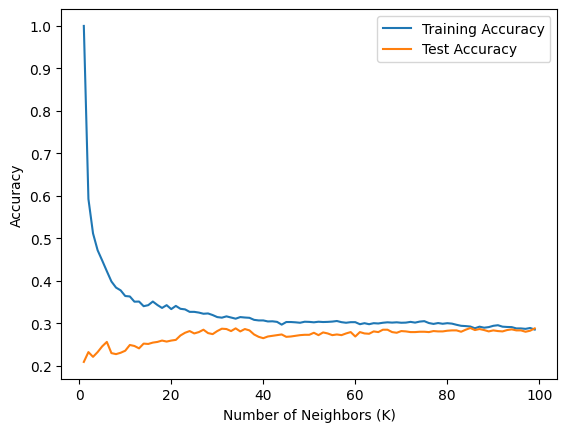

In [33]:
# plot the graph
import matplotlib.pyplot as plt
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# performance with the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_best.fit(X_train, y_train)

In [35]:
# pridiction on training set
y_train_pred = knn_best.predict(X_train)
train_accuracy, train_precision, train_recall, train_f1_score = calculate_metrics(y_train, y_train_pred)

In [36]:
# pridiction on test set
y_test_pred = knn_best.predict(X_test)
test_accuracy, test_precision, test_recall, test_f1_score = calculate_metrics(y_test, y_test_pred)

In [37]:
# output results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1_score}")
print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1_score}")

Training Metrics:
Accuracy: 0.2924076607387141
Precision: 0.03326201128185178
Recall: 0.02928984961118153
F1 Score: 0.031149810550859813

Test Metrics:
Accuracy: 0.28890662410215484
Precision: 0.03323540213000367
Recall: 0.02942610957567875
F1 Score: 0.031214969388634994
